In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = sns.load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Xử lí dữ liệu bị mất

In [ ]:
data = data.dropna()
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


- Vì trong dữ liệu có một số observation chứa N/A nên mình sẽ  có thể xóa bị đi những dữ liệu đó bằng hàm dropna.

In [ ]:
data.ffill(inplace = True)

- Hàm trên là hàm ffill() viết tắt của forward fill, hàm này có chức năng gán mọi giá trị N/A bằng giá trị ở observation trước. Nếu không có giá trị nào khác N/A ở trước observation hiện tại thì hàm không thể fill được giá trị N/A.

In [ ]:
data.bfill(inplace = True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


- Hàm trên là hàm bfill() viết tắt của backward fill, hàm này có chức năng gán mọi giá trị N/A bằng giá trị ở observation sau. Nếu không có giá trị nào khác N/A ở sau observation hiện tại thì hàm không thể fill được giá trị N/A.

In [ ]:
print(data.mode())

  species  island  bill_length_mm  ...  flipper_length_mm  body_mass_g   sex
0  Adelie  Biscoe            41.1  ...              190.0       3800.0  Male

[1 rows x 7 columns]


In [ ]:
replace_values = {"species" : 'Adelie' , "island" : 'Biscoe' , "bill_length_mm" : data['bill_length_mm'].mean(),
                  "bill_depth_mm" : data['bill_depth_mm'].mean() , "flipper_length_mm" : data['flipper_length_mm'].mean()
                  , "body_mass_g" : data['body_mass_g'].mean()  , "sex" : 'Male'}

data.fillna(value = replace_values , inplace = True)

- Hàm trên là fillna có tác dụng thay thế các giá trị N/A với nhiều tùy chính khác nhau. Trong trường hợp trên, mỗi cột đều được gán cho một giá trị thay thế cho N/A. Các quantitative predictor thay thế các giá trị N/A bởi mean của các giá trị khác N/A và các qualitative predictor thay thế các giá trị N/A bởi giá trị xuất hiều nhiều nhất khác N/A.

# Tách dataset thành Training-data và Test-data

In [ ]:
train_data , test_data = train_test_split(data , test_size = 0.4 , random_state = 24521421)

print(train_data.shape)
print(test_data.shape)

- hàm train_test_split được sử dụng để tách dataset thành 2 phần ngẫu nhiên với test_size là kích thước test_data, ở đây được set test_size = 0.4 tức là test_data = 40% dataset ban đầu. Bên cạnh đó là random_state là một seed để lấy ngẫu nhiên các observation để chia vào 2 tập.

In [ ]:
X = data[data.columns.drop(['sex'])]
y = data['sex']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.4 , random_state = 24521421)

- Ngoài ra, train_test_split cũng có thể được sử dụng như thế này. Tách riêng X là các predictor sử dụng để dự đoán các response trong y.

# Classification trên Giới tính

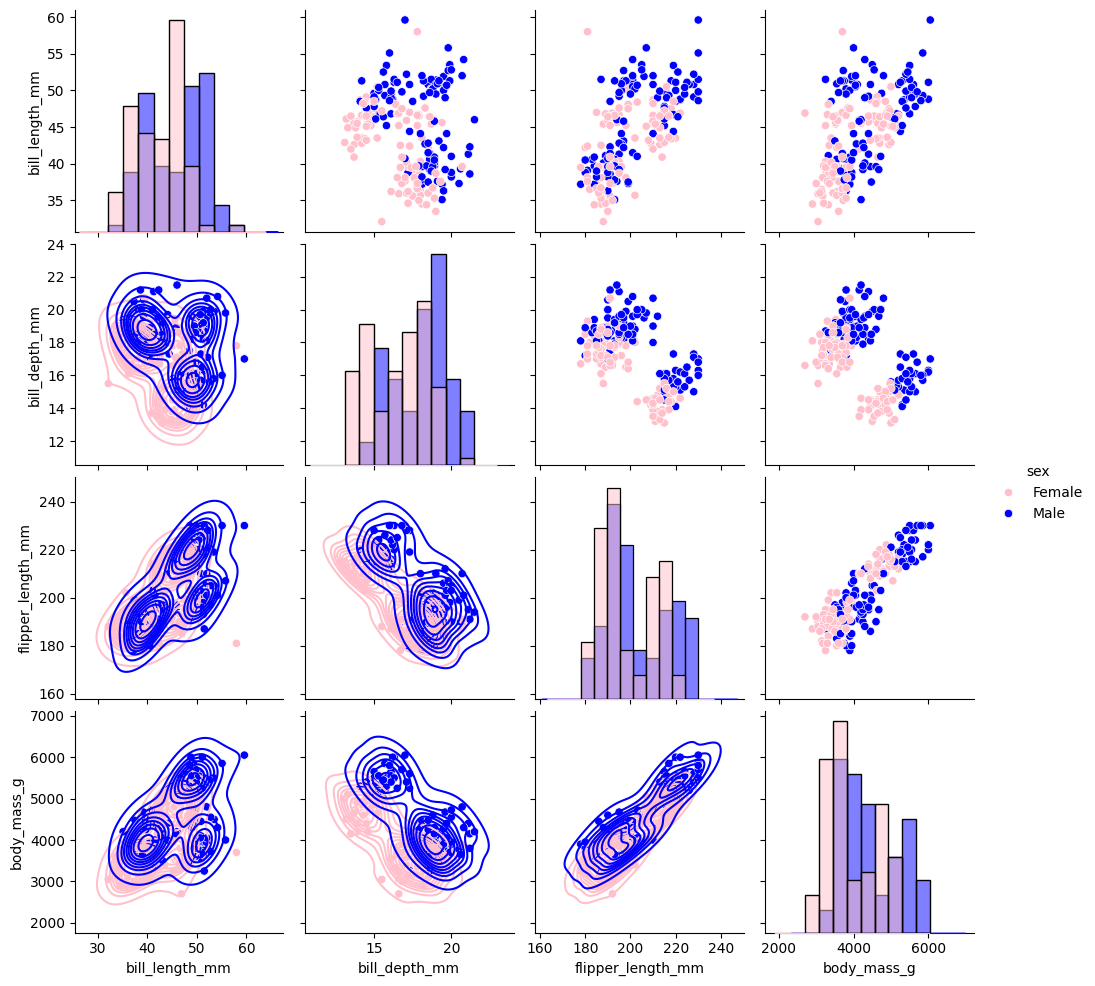

In [ ]:
palette = {'Male' : 'Blue' , 'Female' : 'Pink'}
g = sns.pairplot(data=train_data , vars = data.columns[2:6] , hue='sex' , palette = palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

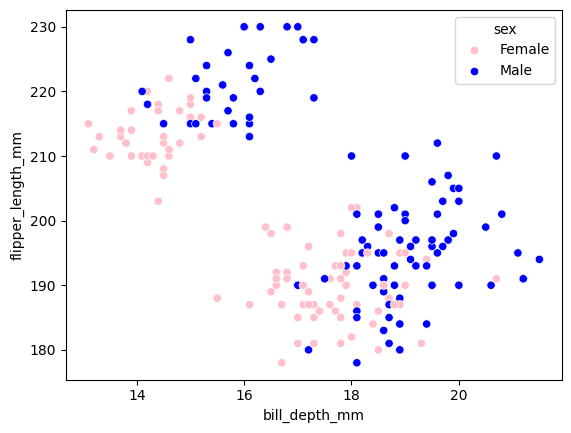

In [ ]:
sns.scatterplot(data = train_data , x = 'bill_depth_mm' , y = 'flipper_length_mm' , hue = 'sex' , palette = palette)

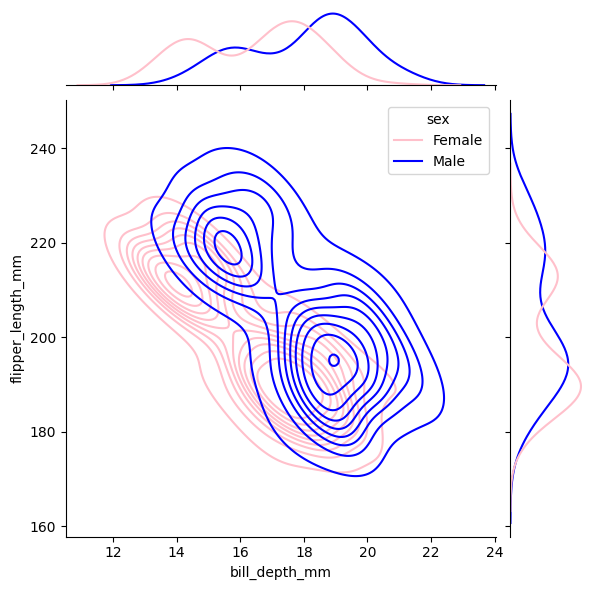

In [ ]:
sns.jointplot(data = train_data , x = 'bill_depth_mm' , y = 'flipper_length_mm' , kind = 'kde' , hue = 'sex' , palette = palette)

- Có vẻ như cặp (bill_depth_mm , flipper_length_mm) có tính Classification cao. Và tương tư như với cặp (bill_depth_mm , body_mass_g).

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

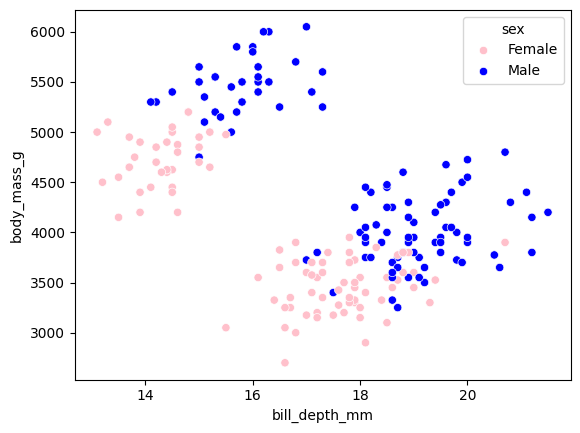

In [ ]:
sns.scatterplot(data = train_data , x = 'bill_depth_mm' , y = 'body_mass_g' , hue = 'sex' , palette = palette)

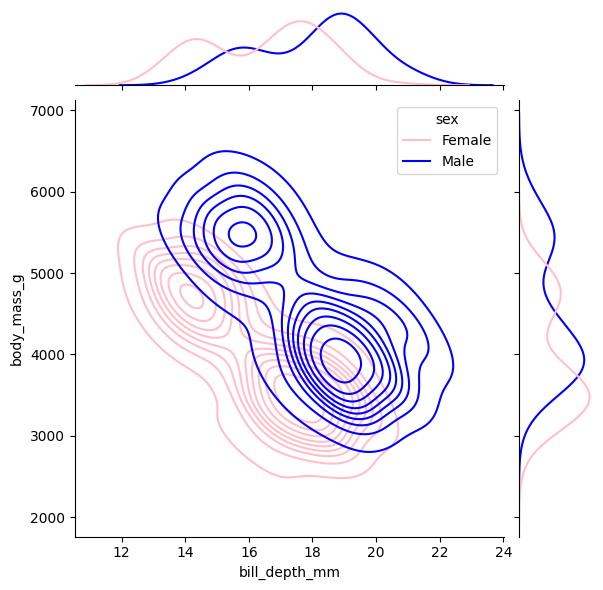

In [ ]:
sns.jointplot(data = train_data , x = 'bill_depth_mm' , y = 'body_mass_g' , kind = 'kde' , hue = 'sex' , palette = palette)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=24521421)

design = train_data[['bill_depth_mm' , 'body_mass_g' , 'flipper_length_mm']]
y = train_data['sex']

model.fit(design , y)

DecisionTreeClassifier(random_state=24521421)

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

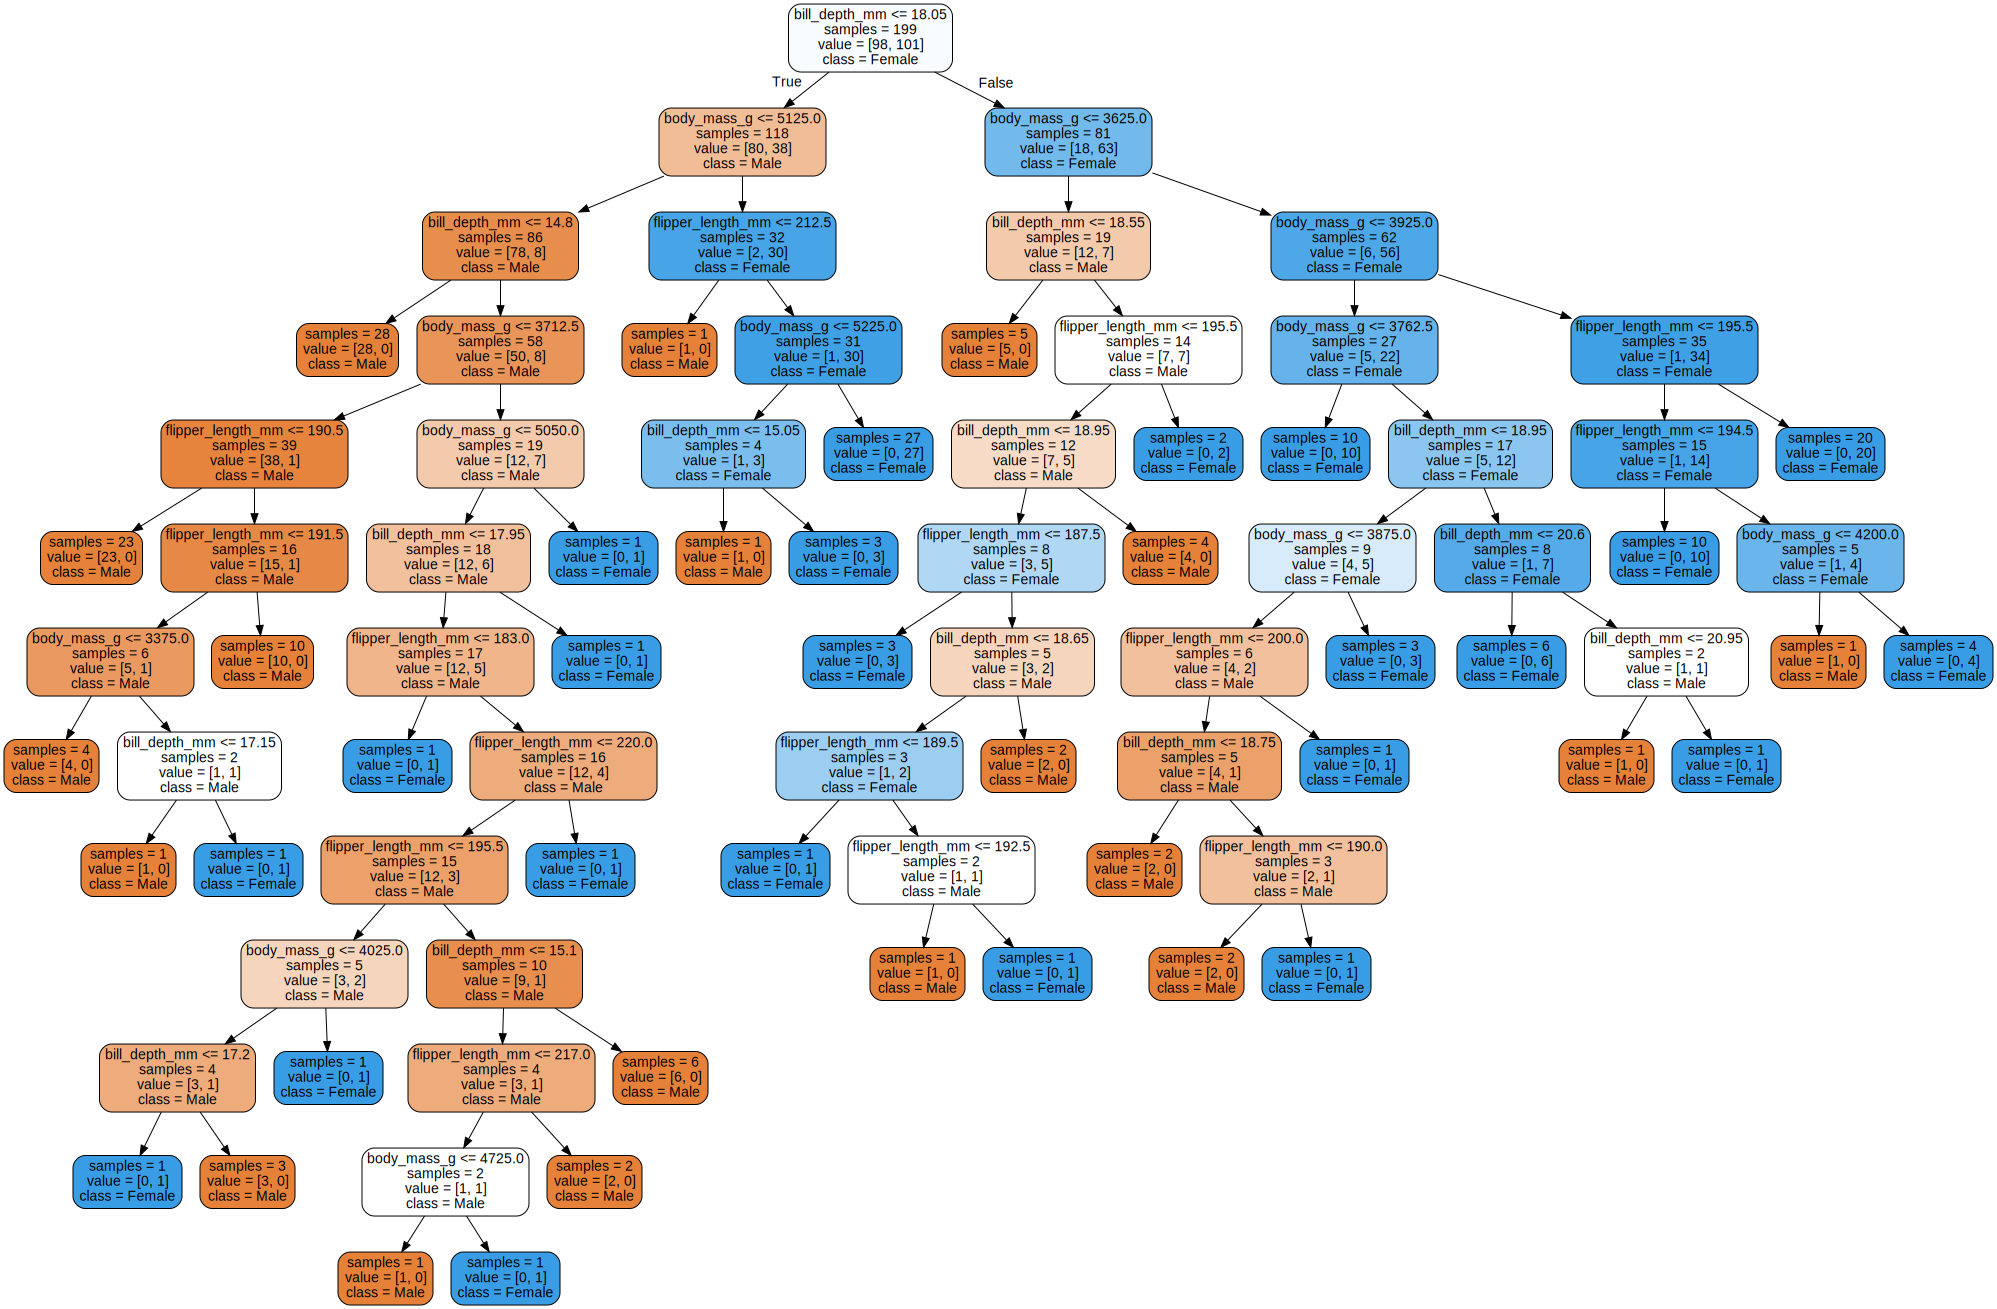

In [ ]:
target = ['Male' , 'Female']
export_graphviz(model , out_file = 'penguins.dot' , feature_names= design.columns , class_names= target , filled = True , rounded = True , impurity= False)
Source.from_file('penguins.dot')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
test_data_changed = test_data[['bill_depth_mm' , 'body_mass_g' , 'flipper_length_mm']]
test_pred = model.predict(test_data_changed)

acc = accuracy_score(test_data['sex'] , test_pred)

print(acc)

0.8507462686567164


- Có vẻ như chúng ta đang gặp trường hợp Overfitting nên ta sẽ cố gắng giảm bằng cách đặt maxdepth = 2.

In [ ]:
model = DecisionTreeClassifier(max_depth = 2 , random_state=24521421)

design = train_data[['bill_depth_mm' , 'body_mass_g' , 'flipper_length_mm']]
y = train_data['sex']

model.fit(design , y)

DecisionTreeClassifier(max_depth=2, random_state=24521421)

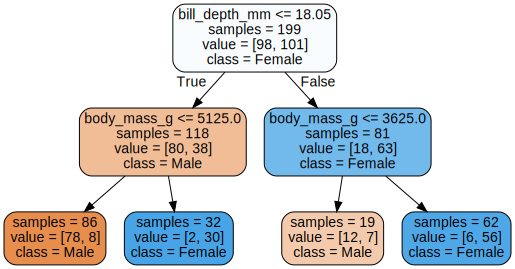

In [ ]:
target = ['Male' , 'Female']
export_graphviz(model , out_file = 'penguins.dot' , feature_names= design.columns , class_names= target , filled = True , rounded = True , impurity= False)
Source.from_file('penguins.dot')

In [ ]:
test_data_changed = test_data[['bill_depth_mm' , 'body_mass_g' , 'flipper_length_mm']]
test_pred = model.predict(test_data_changed)

acc = accuracy_score(test_data['sex'] , test_pred)

print(acc)

0.8582089552238806


- Sau khi set max_depth = 3 thì model có vẻ tốt hơn một chút.

- Đối với hyperparameter max_depth, đây là thông số chỉ độ cao tối đa của cây, ảnh hưởng trực tiếp tới performance của model. Để giải thích cho việc này, nếu max_depth quá nhỏ, trong trường hợp này max_depth = 1 thì sẽ dẫn tới việc Underfitting. Và nếu max_depth quá lớn, sẽ dẫn tới Overfitting bộ trainning dataset.